<a href="https://colab.research.google.com/github/ritesh200tiwari/Convert_Color_Image_to_Pencil_Sketch/blob/main/sketch_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install imageio

# Commented out IPython magic to ensure Python compatibility.

In [23]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

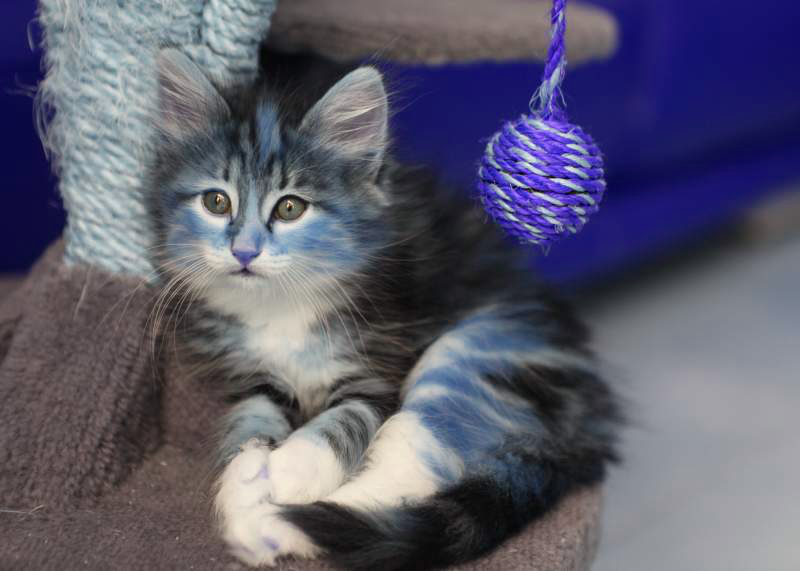

In [24]:
# Create a list to store the urls of the images
urls = ["https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  myImg = io.imread(url) 
  #image_2 = cv.cvtColor(myImg, cv.COLOR_BGR2RGB)
  #final_frame = cv.hconcat((myImg, image_2))
  #cv2_imshow(final_frame)
  cv2_imshow(myImg)
  print('\n')

In [25]:
def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(myImg)

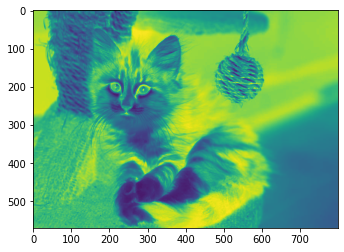

In [26]:
#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

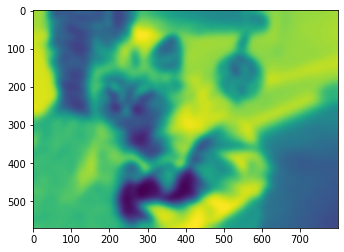

In [27]:

#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=9)
plt.imshow(blurred_img)

In [28]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [29]:
#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)

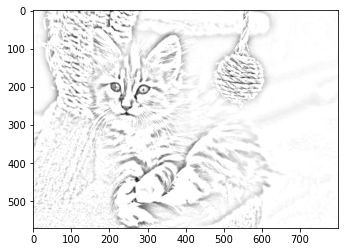

In [30]:
#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [31]:
#Save the image
plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)